In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

features = list()
with open('/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/features.txt') as f:
  features = [line.split()[1] for line in f.readlines()]
print("No. of features: {}".format(len(features)))

No. of features: 561


## Loading Training Dataset

In [3]:
X_train = pd.read_csv('/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_train.columns = features

X_train['subject'] = pd.read_csv('/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/train/subject_train.txt', header=None)

Y_train = pd.read_csv('/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/train/y_train.txt', names=['Activity'])
Y_train_labels = Y_train['Activity'].map({1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'})

train = X_train
train['Activity'] = Y_train
train['ActivityName'] = Y_train_labels
train.head()

<ipython-input-3-ca4e911c4359>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None, encoding='latin-1')


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [4]:
train.shape

(7352, 564)

##Loading Test Dataset

In [5]:
X_test = pd.read_csv('/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_test.columns = features

X_test['subject'] = pd.read_csv('/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/test/subject_test.txt', header=None)

Y_test = pd.read_csv('/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/test/y_test.txt', names=['Activity'])
Y_test_labels = Y_test['Activity'].map({1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'})

test = X_test
test['Activity'] = Y_test
test['ActivityName'] = Y_test_labels
test.head()

<ipython-input-5-b543525085b1>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None, encoding='latin-1')


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [6]:
test.shape

(2947, 564)

## Data Cleaning

###1. Check for Duplicates

In [7]:
print("No. of duplicates in train: {}".format(sum(train.duplicated())))
print("No. of duplicates in test: {}".format(sum(test.duplicated())))

No. of duplicates in train: 0
No. of duplicates in test: 0


###2. Checking for NaN/null values

In [8]:
print("We have {} NaN/Null values in train".format(train.isnull().values.sum()))
print("We have {} NaN/Null values in test".format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


###3. Check for data imbalance

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

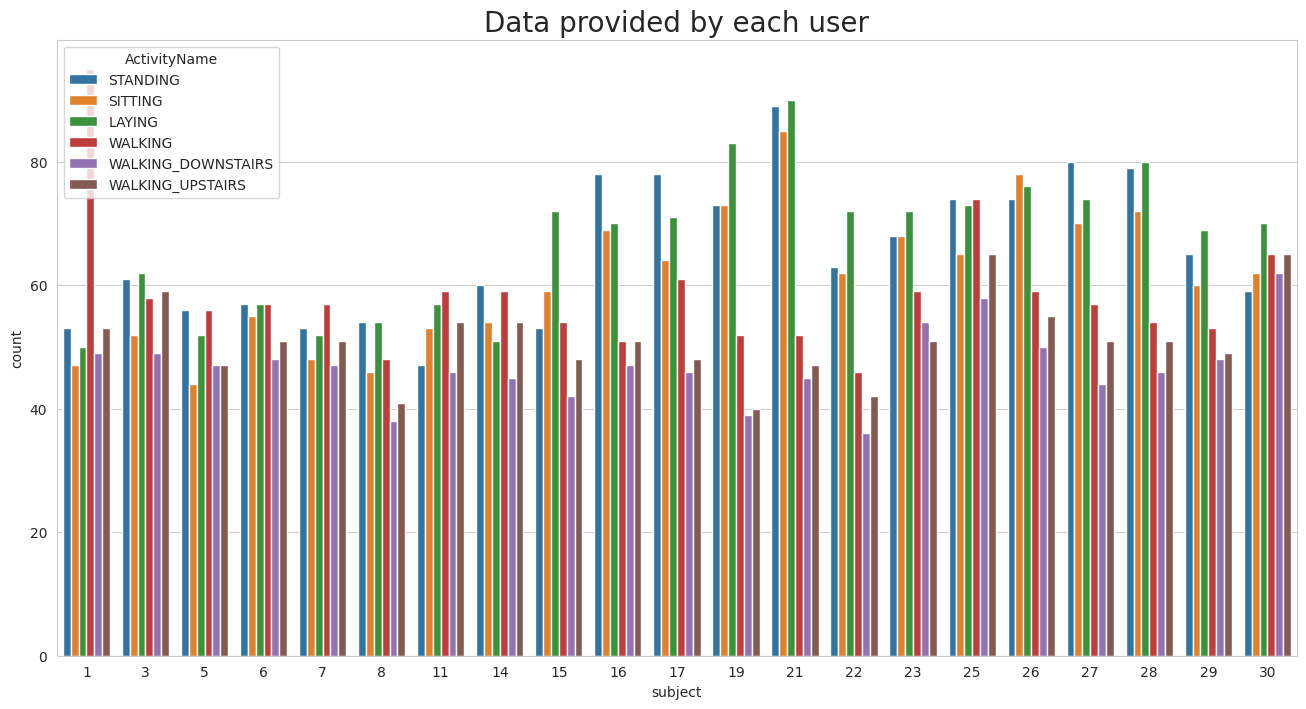

In [10]:
plt.figure(figsize=(16, 8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject', hue='ActivityName', data=train)
plt.show()

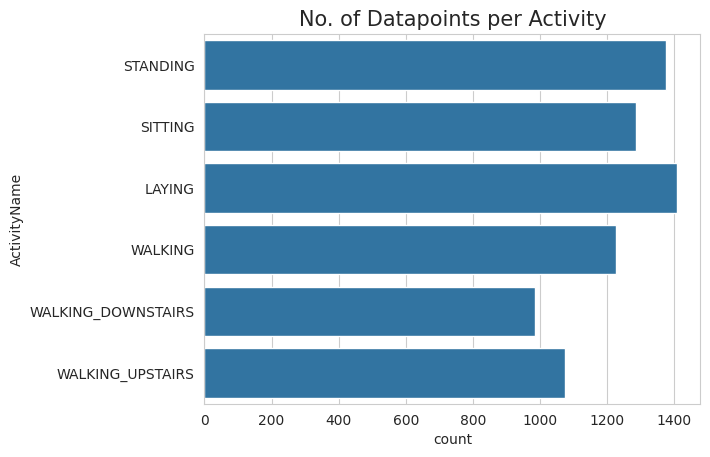

In [11]:
plt.title('No. of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.show()

###4. Changing feature names

In [12]:
columns = train.columns

columns = columns.str.replace('[()]', '')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]', '')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

###5. Save this dataframe in a csv files

In [13]:
train.to_csv('/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/csv_files/test.csv', index=False)

##Exploratory Data Analysis

###Stationary and Moving activities are completely different

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/pyt

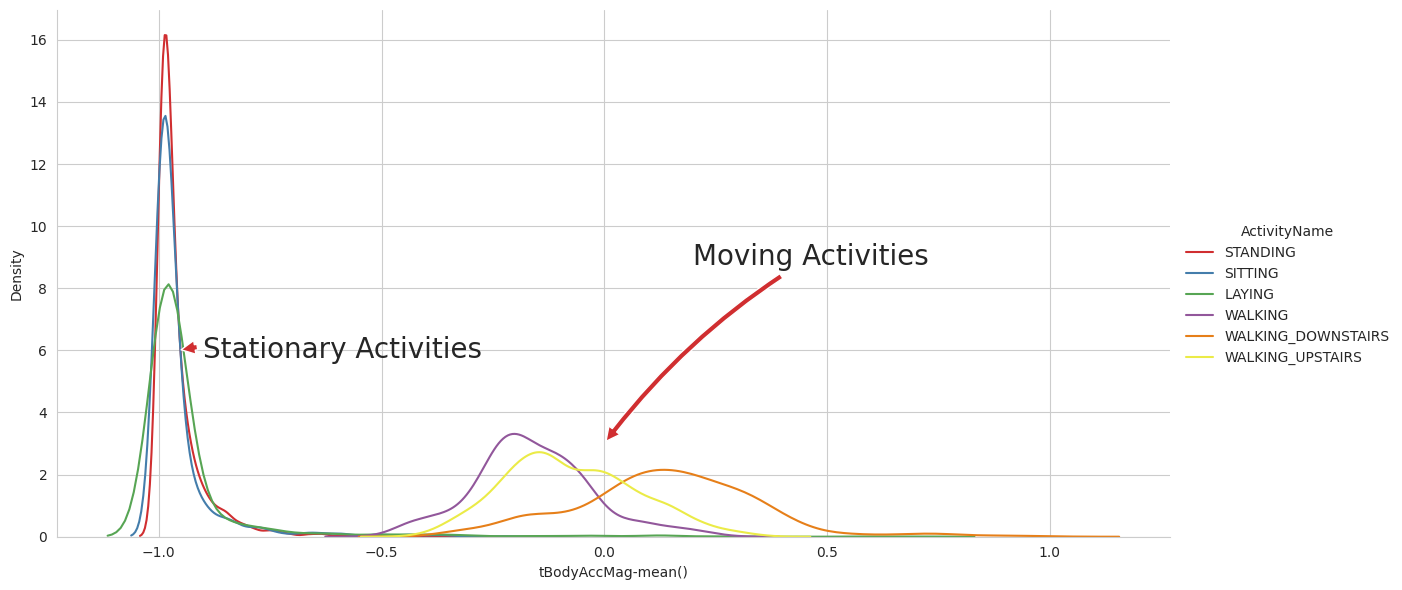

In [14]:
sns.set_palette("Set1", desat=0.8)
facetgrid = sns.FacetGrid(train, hue="ActivityName", height=6, aspect=2)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist=False).add_legend()
plt.annotate("Stationary Activities", xy = (-0.956, 6), xytext=(-0.9, 6), size=20, va='center', ha='left', arrowprops=dict(arrowstyle='simple', connectionstyle='arc3,rad=0.1'))
plt.annotate("Moving Activities", xy = (0, 3), xytext=(0.2, 9), size=20, va='center', ha='left', arrowprops=dict(arrowstyle='simple', connectionstyle='arc3,rad=0.1'))
plt.show()

##Applying t-sne on the data

In [15]:
from sklearn.manifold import TSNE

In [16]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
  for index, perplexity in enumerate(perplexities):
    print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
    X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
    print('Done...')

    print('Creating plot for this t-sne visualization')
    df =  pd.DataFrame({'x': X_reduced[:, 0], 'y': X_reduced[:, 1], 'label': y_data})

    sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8, palette='Set1', markers=['^', 'v', 's', 'o', '1', '2'])
    plt.title('perplexity : {} and max_iter : {}'.format(perplexity, n_iter))
    img_name = img_name_prefix + '_prep_{}_iter_{}.png'.format(perplexity, n_iter)
    print('saving this plot as image in present working directory...')
    plt.savefig(img_name)
    plt.show()
    print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.025s...
[t-SNE] Computed neighbors for 7352 samples in 3.267s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.032s
[t-SNE] Iteration 50: error = 119.3267517, gradient norm = 0.0423645 (50 iterations in 7.573s)
[t-SNE] Iteration 100: error = 105.1708298, gradient norm = 0.0251450 (50 iterations in 

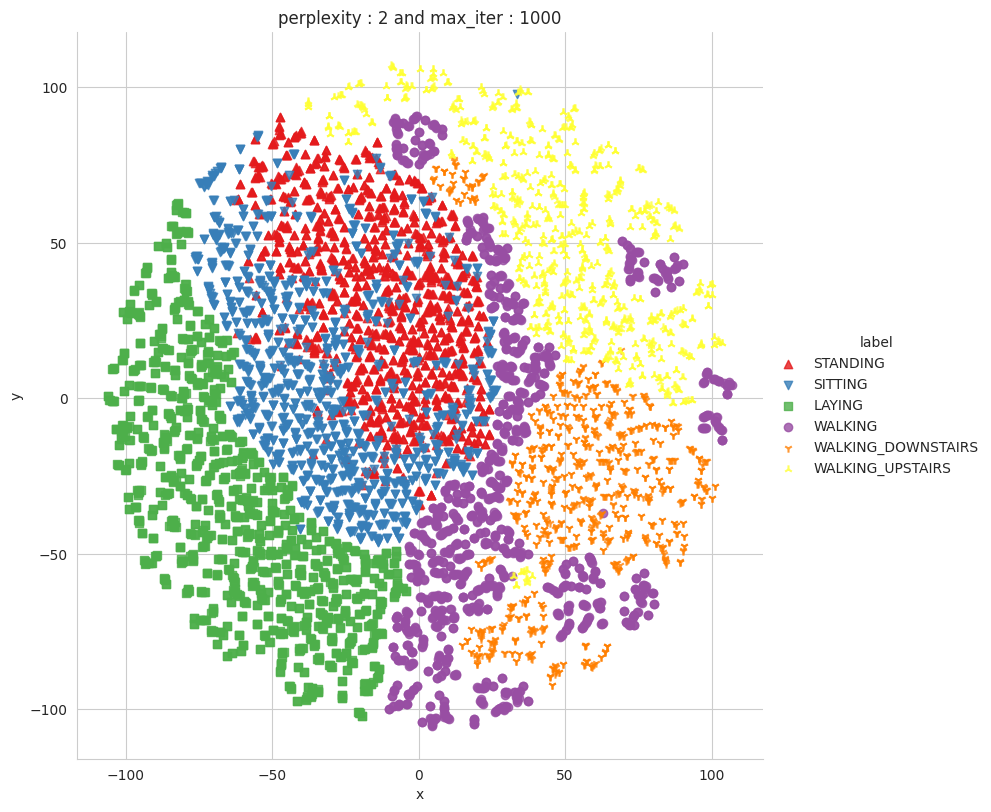

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.024s...
[t-SNE] Computed neighbors for 7352 samples in 3.642s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.033s
[t-SNE] Iteration 50: error = 107.1765594, gradient norm = 0.0391240 (50 iterations in 5.585s)
[t-SNE] Iteration 100: error = 95.6860199, gradient norm = 0.0149185 (50 iteration

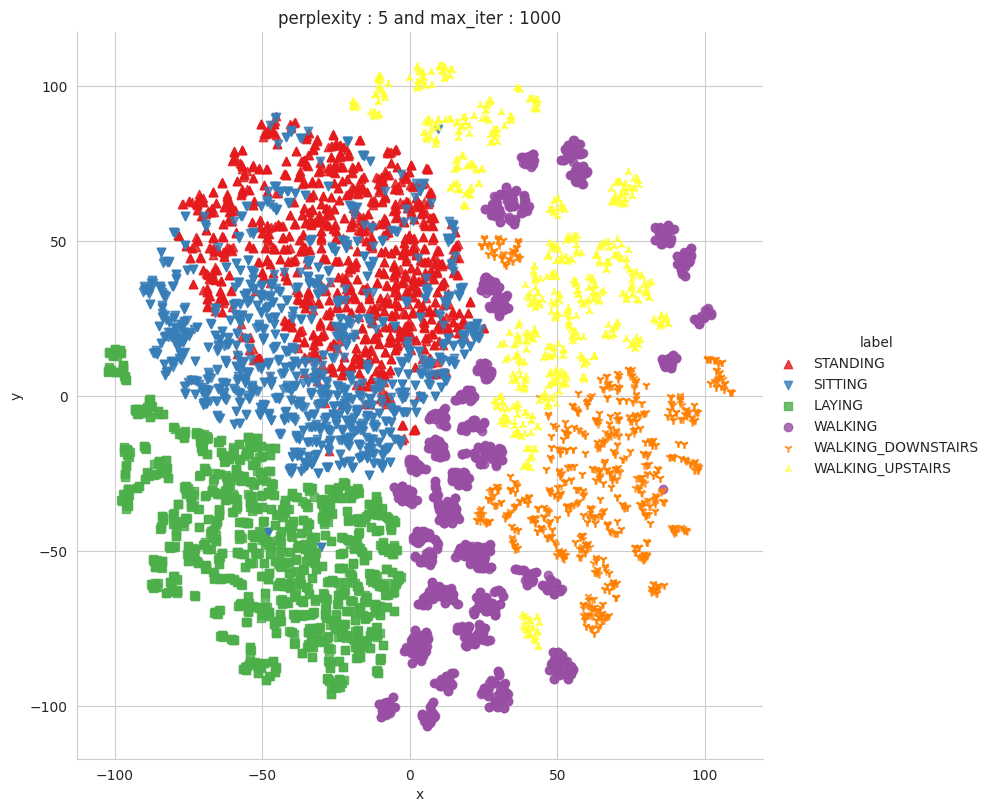

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.021s...
[t-SNE] Computed neighbors for 7352 samples in 2.523s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.064s
[t-SNE] Iteration 50: error = 97.8988724, gradient norm = 0.0357303 (50 iterations in 6.505s)
[t-SNE] Iteration 100: error = 88.9268494, gradient norm = 0.0100836 (50 iteration

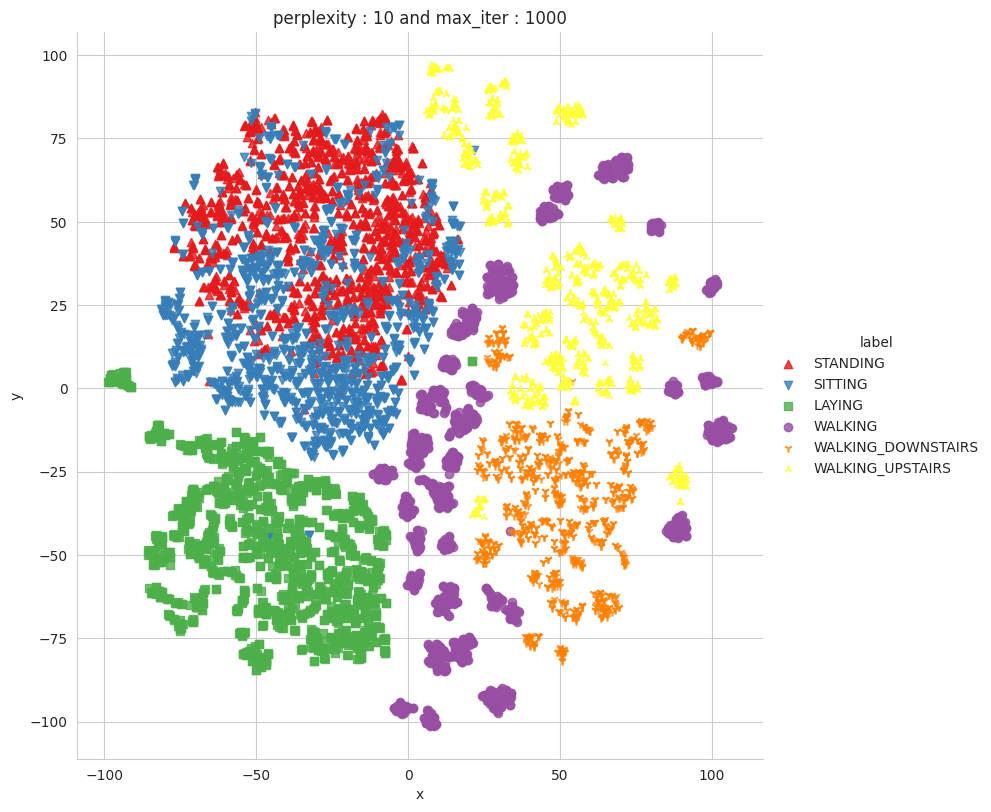

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.021s...
[t-SNE] Computed neighbors for 7352 samples in 2.846s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.196s
[t-SNE] Iteration 50: error = 89.2826843, gradient norm = 0.0295789 (50 iterations in 7.807s)
[t-SNE] Iteration 100: error = 82.9671707, gradient norm = 0.0083625 (50 iteration

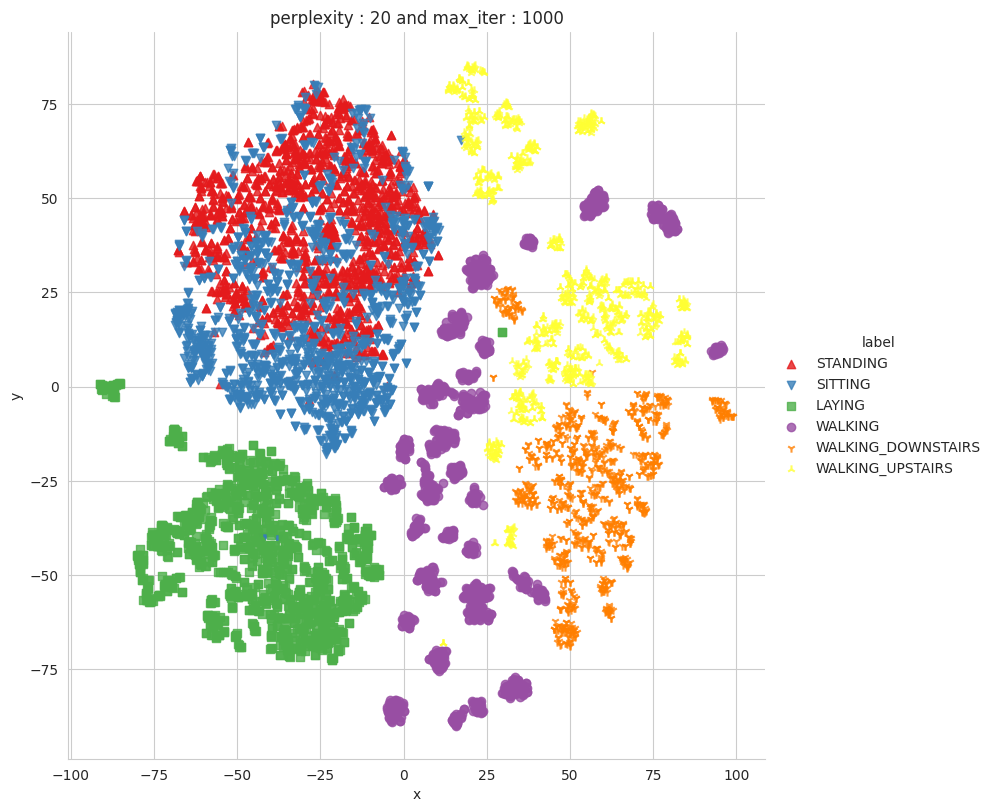

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.025s...
[t-SNE] Computed neighbors for 7352 samples in 3.778s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.490s
[t-SNE] Iteration 50: error = 78.8176270, gradient norm = 0.0256966 (50 iterations in 10.848s)
[t-SNE] Iteration 100: error = 75.2225494, gradient norm = 0.0051095 (50 iterati

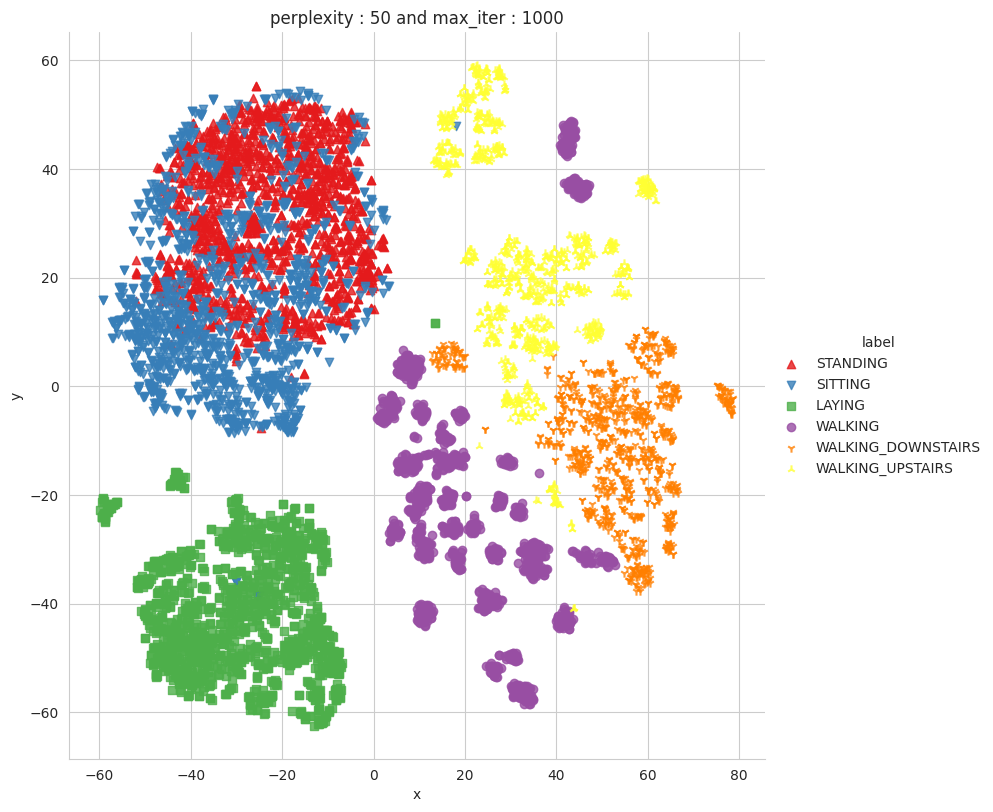

Done


In [17]:
X_pre_tsne = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data=X_pre_tsne, y_data=y_pre_tsne, perplexities=[2, 5, 10, 20, 50])

##Obtain train and test data

In [18]:
train = pd.read_csv('/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [19]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [20]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [21]:
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [22]:
print('X_train and y_train shape : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test and y_test shape :  ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train shape : ((7352, 561),(7352,))
X_test and y_test shape :  ((2947, 561),(2947,))


##Lets Model with our data

###Labels that are useful in plotting confusion matrix

In [23]:
labels=['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

###Function to plot confusion matrix

In [24]:
import itertools
from sklearn.metrics import confusion_matrix
plt.rcParams['font.family'] = 'Dejavu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###Generic function to run any model specified

In [25]:
from datetime import datetime

def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, print_cm=True, cm_map=plt.cm.Greens):

  results = dict()

  train_start_time = datetime.now()
  print('training the model..')
  model.fit(X_train, y_train)
  print('Done \n \n')
  train_end_time = datetime.now()

  results['training_time'] = train_end_time - train_start_time
  print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))

  print('Predicting Test data')
  test_start_time = datetime.now()
  y_pred = model.predict(X_test)
  test_end_time = datetime.now()
  print('Done \n \n')
  results['testing_time'] = test_end_time - test_start_time
  print('testing_time(HH:MM:SS.ms) - {}\n\n'.format(results['testing_time']))
  results['predicted'] = y_pred

  accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
  results['accuracy'] = accuracy
  print('-----------------------')
  print('|      Accuracy       |')
  print('-----------------------')
  print('\n    {}\n\n'.format(accuracy))

  cm = metrics.confusion_matrix(y_test, y_pred)
  results['confusion_matrix'] = cm
  if print_cm:
    print('-----------------------')
    print('|   Confusion Matrix  |')
    print('-----------------------')
    print('\n {}'.format(cm))

  plt.figure(figsize=(8,8))
  plt.grid(visible=False)
  plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap=cm_map)
  plt.show()

  print('----------------------------')
  print('|   Classification Report  |')
  print('----------------------------')
  classification_report = metrics.classification_report(y_test, y_pred)
  results['classification_report'] = classification_report
  print(classification_report)

  results['model'] = model

  return results

###Method to print grid search attributes

In [26]:
def print_grid_search_attributes(model):
  print('---------------------------')
  print('|      Best Estimator     |')
  print('---------------------------')
  print('\n\t{}\n'.format(model.best_estimator_))

  print('---------------------------')
  print('|     Best Parameters     |')
  print('---------------------------')
  print('\tParameters of best estimaator : \n\n\t{}\n'.format(model.best_params_))

  print('--------------------------------------')
  print('|     No. of CrossValidation sets    |')
  print('--------------------------------------')
  print('\n\tTotal number of cross validation sets : {}\n'.format(model.n_splits_))

  print('----------------------')
  print('|     Best Score     |')
  print('----------------------')
  print('\n\tAverage Cross Validated scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

###Logistic Regression with Grid Search

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

Done 
 

training_time(HH:MM:SS.ms) - 0:00:32.897177


Predicting Test data
Done 
 

testing_time(HH:MM:SS.ms) - 0:00:00.024729


-----------------------
|      Accuracy       |
-----------------------

    0.9586019681031558


-----------------------
|   Confusion Matrix  |
-----------------------

 [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 403  13]
 [  0   0   0  24   2 445]]


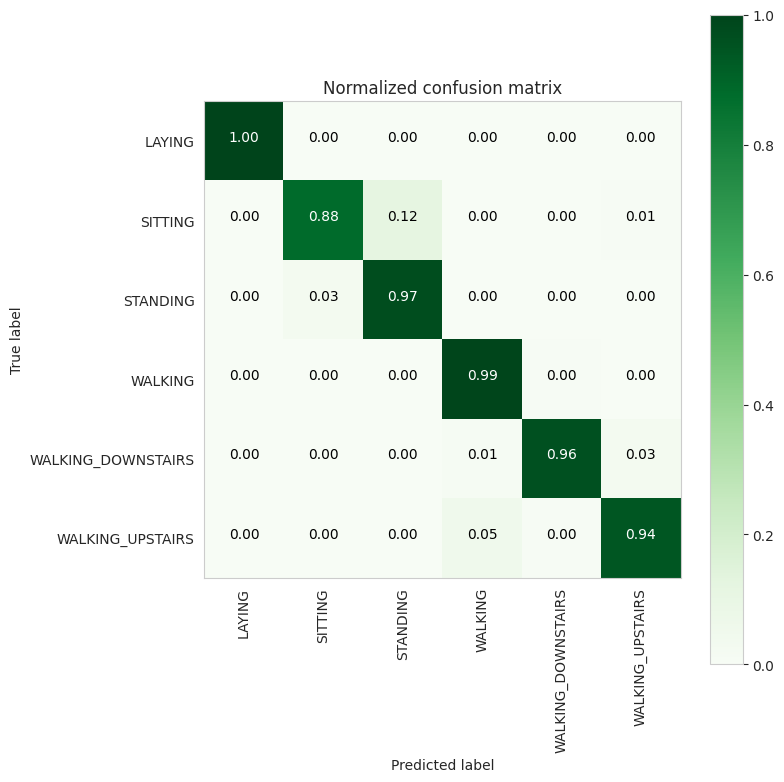

----------------------------
|   Classification Report  |
----------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [27]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.01, 0.1, 1, 10, 20, 30], 'penalty': ['l1', 'l2']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [28]:
print_grid_search_attributes(log_reg_grid_results['model'])

---------------------------
|      Best Estimator     |
---------------------------

	LogisticRegression(C=1)

---------------------------
|     Best Parameters     |
---------------------------
	Parameters of best estimaator : 

	{'C': 1, 'penalty': 'l2'}

--------------------------------------
|     No. of CrossValidation sets    |
--------------------------------------

	Total number of cross validation sets : 3

----------------------
|     Best Score     |
----------------------

	Average Cross Validated scores of best estimator : 

	0.9368895661079609



###Linear SVC with Grid Search

In [29]:
from sklearn.svm import LinearSVC

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:01:19.262645


Predicting Test data
Done 
 

testing_time(HH:MM:SS.ms) - 0:00:00.038968


-----------------------
|      Accuracy       |
-----------------------

    0.9664065151001018


-----------------------
|   Confusion Matrix  |
-----------------------

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 411   6]
 [  0   0   0  17   0 454]]


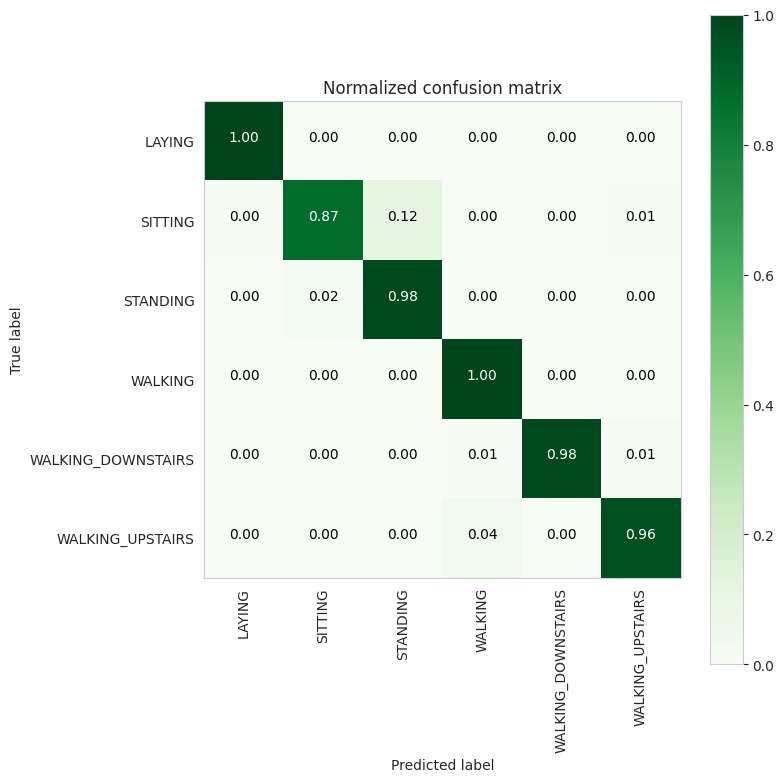

----------------------------
|   Classification Report  |
----------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [30]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [31]:
print_grid_search_attributes(lr_svc_grid_results['model'])

---------------------------
|      Best Estimator     |
---------------------------

	LinearSVC(C=0.5, tol=5e-05)

---------------------------
|     Best Parameters     |
---------------------------
	Parameters of best estimaator : 

	{'C': 0.5}

--------------------------------------
|     No. of CrossValidation sets    |
--------------------------------------

	Total number of cross validation sets : 5

----------------------
|     Best Score     |
----------------------

	Average Cross Validated scores of best estimator : 

	0.9417922927158628



###Kernel SVM with Grid Search

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:09:52.287086


Predicting Test data
Done 
 

testing_time(HH:MM:SS.ms) - 0:00:01.909936


-----------------------
|      Accuracy       |
-----------------------

    0.9626739056667798


-----------------------
|   Confusion Matrix  |
-----------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


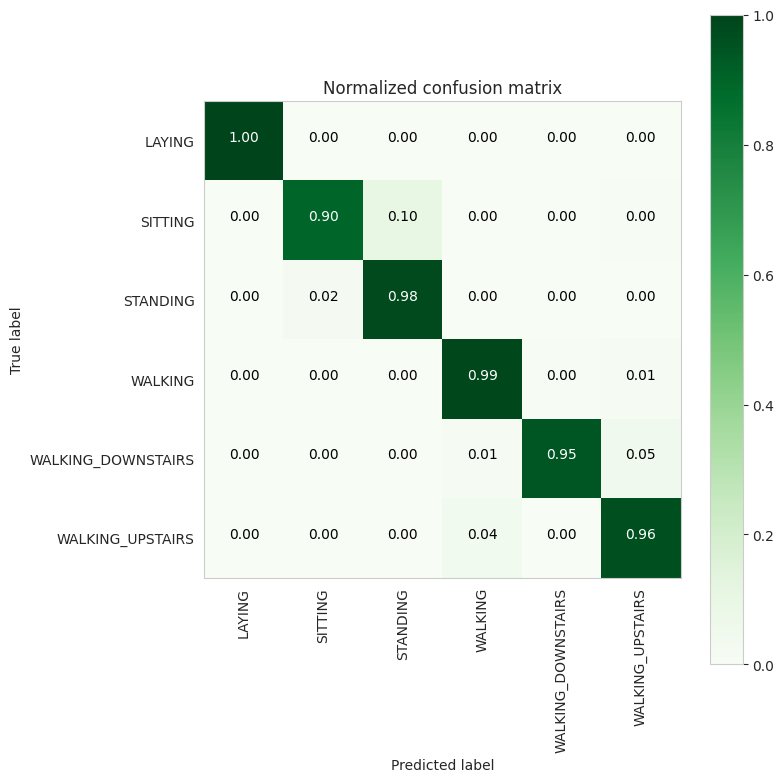

----------------------------
|   Classification Report  |
----------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [32]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16], 'gamma':[0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm, param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [33]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

---------------------------
|      Best Estimator     |
---------------------------

	SVC(C=16, gamma=0.0078125)

---------------------------
|     Best Parameters     |
---------------------------
	Parameters of best estimaator : 

	{'C': 16, 'gamma': 0.0078125}

--------------------------------------
|     No. of CrossValidation sets    |
--------------------------------------

	Total number of cross validation sets : 5

----------------------
|     Best Score     |
----------------------

	Average Cross Validated scores of best estimator : 

	0.9447834551903698



###Decision tree with Grid Search CV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:47.520416


Predicting Test data
Done 
 

testing_time(HH:MM:SS.ms) - 0:00:00.011000


-----------------------
|      Accuracy       |
-----------------------

    0.8720732948761453


-----------------------
|   Confusion Matrix  |
-----------------------

 [[537   0   0   0   0   0]
 [  0 377 114   0   0   0]
 [  0  60 472   0   0   0]
 [  0   0   0 472  17   7]
 [  0   0   0  23 351  46]
 [  0   0   0  68  42 361]]


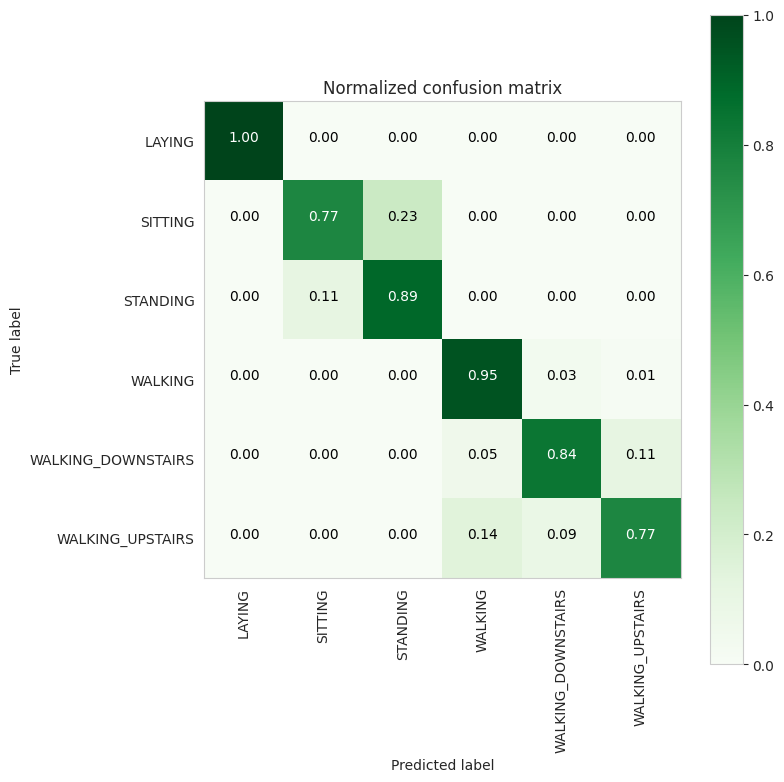

----------------------------
|   Classification Report  |
----------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.77      0.81       491
          STANDING       0.81      0.89      0.84       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.86      0.84      0.85       420
  WALKING_UPSTAIRS       0.87      0.77      0.82       471

          accuracy                           0.87      2947
         macro avg       0.87      0.87      0.87      2947
      weighted avg       0.87      0.87      0.87      2947

---------------------------
|      Best Estimator     |
---------------------------

	DecisionTreeClassifier(max_depth=np.int64(9))

---------------------------
|     Best Parameters     |
---------------------------
	Parameters of best estimaator : 

	{'max_depth': np.int64(9)}

-----------------------------

In [34]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth': np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

###Random Forest Classifier with Grid Search

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:37:42.211252


Predicting Test data
Done 
 

testing_time(HH:MM:SS.ms) - 0:00:00.050733


-----------------------
|      Accuracy       |
-----------------------

    0.9243298269426535


-----------------------
|   Confusion Matrix  |
-----------------------

 [[537   0   0   0   0   0]
 [  0 424  67   0   0   0]
 [  0  39 493   0   0   0]
 [  0   0   0 482   8   6]
 [  0   0   0  19 360  41]
 [  0   0   0  37   6 428]]


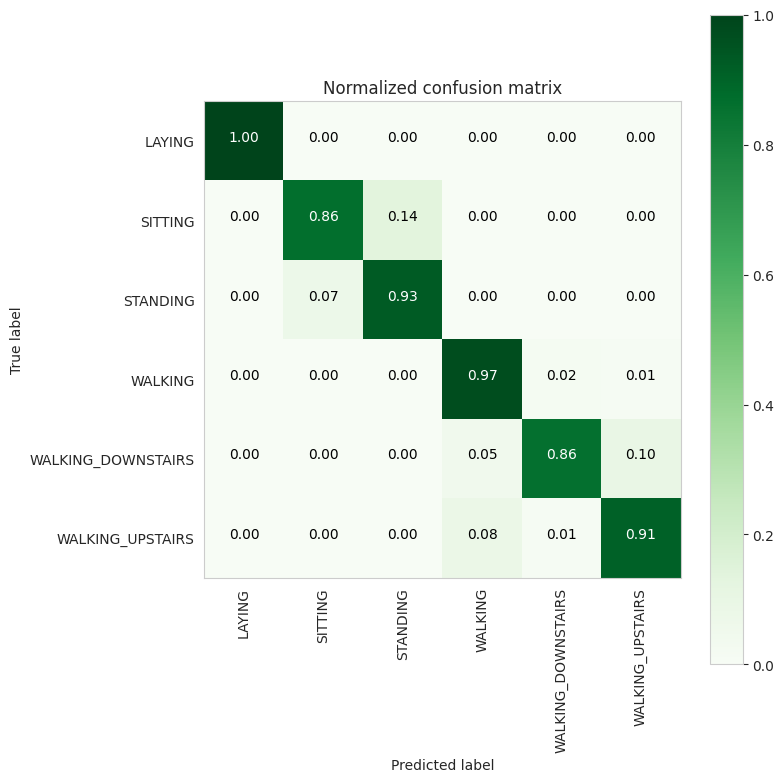

----------------------------
|   Classification Report  |
----------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.86      0.89       491
          STANDING       0.88      0.93      0.90       532
           WALKING       0.90      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.86      0.91       420
  WALKING_UPSTAIRS       0.90      0.91      0.90       471

          accuracy                           0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.92      0.92      2947

---------------------------
|      Best Estimator     |
---------------------------

	RandomForestClassifier(max_depth=np.int64(13), n_estimators=np.int64(90))

---------------------------
|     Best Parameters     |
---------------------------
	Parameters of best estimaator : 

	{'max_depth': np.int64(13), '

In [35]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10, 201, 20), 'max_depth': np.arange(3, 15, 2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

###Comparing all models

In [36]:
print('\n                      Accuracy      Error')
print('                        ----------    -------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100, 100-(log_reg_grid_results['accuracy'] * 100)))
print('Linear SVC          : {:.04}%       {:.04}%'.format(lr_svc_grid_results['accuracy'] * 100, 100-(lr_svc_grid_results['accuracy'] * 100)))
print('rbf SVM Classifier  : {:.04}%       {:.04}%'.format(rbf_svm_grid_results['accuracy'] * 100, 100-(rbf_svm_grid_results['accuracy'] * 100)))
print('Decision Tree       : {:.04}%       {:.04}%'.format(dt_grid_results['accuracy'] * 100, 100-(dt_grid_results['accuracy'] * 100)))
print('Random Forest       : {:.04}%       {:.04}%'.format(rfc_grid_results['accuracy'] * 100, 100-(rfc_grid_results['accuracy'] * 100)))


                      Accuracy      Error
                        ----------    -------
Logistic Regression : 95.86%       4.14%
Linear SVC          : 96.64%       3.359%
rbf SVM Classifier  : 96.27%       3.733%
Decision Tree       : 87.21%       12.79%
Random Forest       : 92.43%       7.567%


##LSTM

In [37]:
ACTIVITIES = {0: 'WALKING',
              1: 'WALKING_DOWNSTAIRS',
              2: 'WALKING_UPSTAIRS',
              3: 'SITTING',
              4: 'STANDING',
              5: 'LAYING'}

def confusion_matrix(Y_true, Y_pred):
  Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
  Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

  return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

###Data

In [38]:
DATADIR = 'UCI_HAR_Dataset'

In [39]:
SIGNALS = ['body_acc_x',
           'body_acc_y',
           'body_acc_z',
           'body_gyro_x',
           'body_gyro_y',
           'body_gyro_z',
           'total_acc_x',
           'total_acc_y',
           'total_acc_z']


In [40]:
def _read_csv(filename):
  return pd.read_csv(filename, delim_whitespace=True, header=None)

def load_signals(subset):
  signals_data = []

  for signal in SIGNALS:
    filename = f'/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
    signals_data.append(_read_csv(filename).values)
  return np.transpose(signals_data, (1, 2, 0))

In [41]:
def load_y(subset):
  filename = f'/content/drive/MyDrive/Colab Datasets/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
  y = _read_csv(filename)[0]
  return pd.get_dummies(y).values

In [42]:
def load_data():
  X_train, X_test = load_signals('train'), load_signals('test')
  y_train, y_test = load_y('train'), load_y('test')

  return X_train, X_test, y_train, y_test

In [43]:
import tensorflow as tf
tf.random.set_seed(42)

In [44]:
'''import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)'''

'import tensorflow.compat.v1 as tf\ntf.disable_v2_behavior()\nsession_conf = tf.ConfigProto(\n    intra_op_parallelism_threads=1,\n    inter_op_parallelism_threads=1\n)'

In [45]:
'''from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)'''

'from keras import backend as K\nsess = tf.Session(graph=tf.get_default_graph(), config=session_conf)\nK.set_session(sess)'

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

In [47]:
epochs = 30
batch_size = 16
n_hidden = 32

In [48]:
def _count_classes(y):
  return len(set([tuple(category) for category in y]))

In [49]:
X_train, X_test, Y_train, Y_test = load_data()

<ipython-input-40-48d78f21907c>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None)
<ipython-input-40-48d78f21907c>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None)
<ipython-input-40-48d78f21907c>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None)
<ipython-input-40-48d78f21907c>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True, header=None)
<ipython-input-40-48d78f

In [50]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


###Defining architecture of LSTM

In [51]:
model = Sequential()
model.add(Input(shape=(timesteps, input_dim)))
model.add(LSTM(n_hidden))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,574 (21.77 KB)

 Trainable params: 5,574 (21.77 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [53]:
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.4530 - loss: 1.3247 - val_accuracy: 0.6101 - val_loss: 0.8624
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.6585 - loss: 0.7830 - val_accuracy: 0.7011 - val_loss: 0.7422
Epoch 3/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.7353 - loss: 0.6280 - val_accuracy: 0.7727 - val_loss: 0.6047
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8004 - loss: 0.4881 - val_accuracy: 0.8035 - val_loss: 0.5568
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.8569 - loss: 0.3886 - val_accuracy: 0.7696 - val_loss: 0.6538
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.8942 - loss: 0.3021 - val_accuracy: 0.8202 - val_loss: 0.5759
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9108 - loss: 0.2754 - val_accuracy: 0.8741 - val_loss: 0.4450
Epoch 8/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9272 - loss: 0.2164 - 

In [54]:
print(confusion_matrix(Y_test, model.predict(X_test)))

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      396        77       16                   1   
STANDING                 0       87       442        2                   1   
WALKING                  0        0         0      492                   1   
WALKING_DOWNSTAIRS       0        0         1        6                 460   
WALKING_UPSTAIRS         0        0         0        2                  21   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING                            3  
WALKING_DOWNSTAIRS                 4  
WALKING_UPSTAIRS                 397  


In [55]:
score = model.evaluate(X_test, Y_test)
score

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8822 - loss: 0.3829


[0.3169519901275635, 0.9243298172950745]